In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [3]:
olympics_data = pd.read_csv('Resources/athlete_events.csv')
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
olympics_data.dropna(subset=['Age', 'Weight'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
olympics_data.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height      1214
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     176954
dtype: int64

In [6]:
olympics_data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [7]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [8]:
# Count how many loss incidents occurred in each city
grouped_age = olympics_data.groupby(["Age"])
grouped_age.count()


,ID,Name,Sex,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Age,,,,,,,,,,,,,,
12.0,2,2,2,0,2,2,2,2,2,2,2,2,2,2
13.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10
14.0,53,53,53,53,53,53,53,53,53,53,53,53,53,53
15.0,155,155,155,155,155,155,155,155,155,155,155,155,155,155
16.0,284,284,284,284,284,284,284,284,284,284,284,284,284,284
17.0,400,400,400,399,400,400,400,400,400,400,400,400,400,400
18.0,646,646,646,644,646,646,646,646,646,646,646,646,646,646
19.0,1033,1033,1033,1025,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
20.0,1562,1562,1562,1550,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562


In [9]:
age_by_medal = grouped_age["Medal"].count()

# Convert the city_counts Series into a DataFrame
fixed_medals = pd.DataFrame(age_by_medal)
fixed_medals.head()

,Medal
Age,
12.0,2
13.0,10
14.0,53
15.0,155
16.0,284


In [10]:
fixed_medals.mean()

Medal    596.568627
dtype: float64

<IPython.core.display.Javascript object>


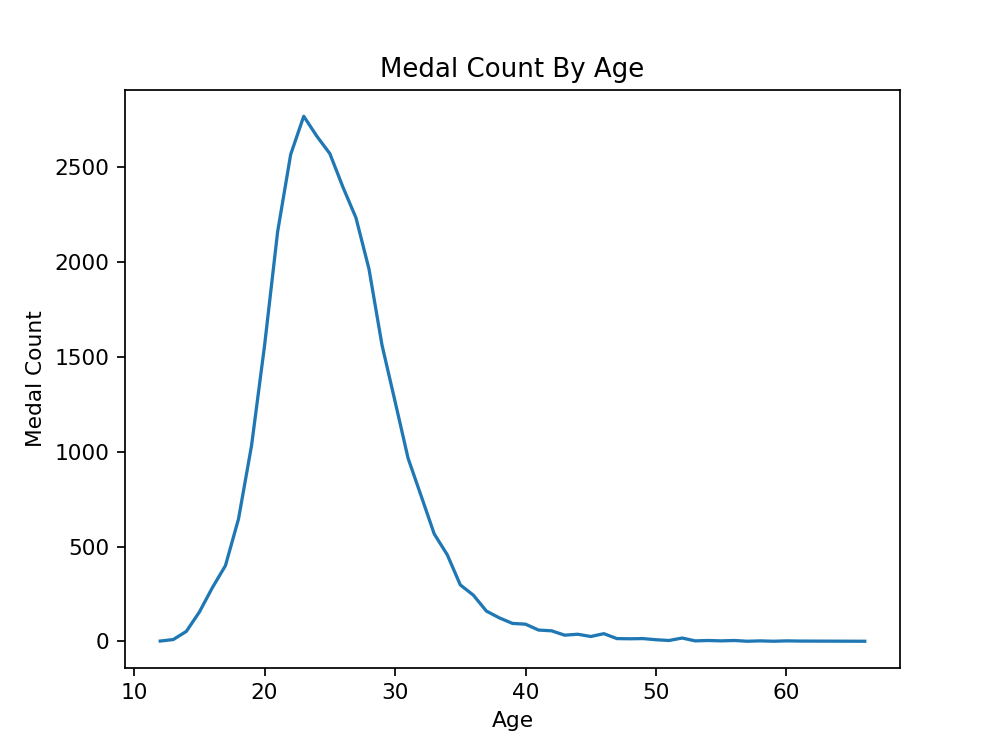

In [11]:
plt.title("Medal Count By Age")
plt.xlabel("Age")
plt.ylabel("Medal Count")
plt.savefig("Output/figure5.png")
plt.plot(fixed_medals)
